In [37]:
import os
import sys
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import ImageGrid
import pickle
from IPython.display import display

In [13]:
OUTPUT_FILE = '6_output.csv'
with open(OUTPUT_FILE, 'r') as fin:
    data_iter = csv.reader(fin)
    data = [np.array(data) for data in data_iter]
data_array = np.array(data)
header_array = data_array[0]
data_array = data_array[1:]
data_array = data_array.astype(np.float32)

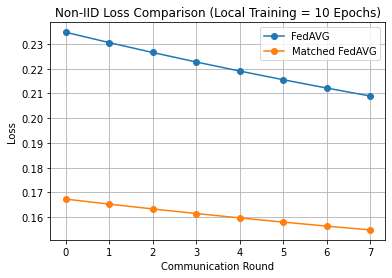

In [14]:
comm_rounds = data_array[:,0].astype(np.int)
fedAvg_test_loss = data_array[:,-2]
matched_fedAvg_test_loss = data_array[:,-1]
fedAVG_local_loss_1 = data_array[:,1]
fedAVG_local_loss_2 = data_array[:,2]
matched_fedAVG_local_loss_1 = data_array[:,3]
matched_fedAVG_local_loss_2 = data_array[:,4]
plt.plot(comm_rounds, fedAvg_test_loss, marker='o', label='FedAVG')
plt.plot(comm_rounds, matched_fedAvg_test_loss, marker='o', label='Matched FedAVG')
plt.title('Non-IID Loss Comparison (Local Training = 10 Epochs)')
plt.xlabel('Communication Round')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc="upper right")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
#plt.ylim(0.15, 0.4)
plt.show()

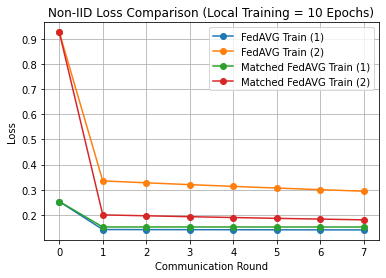

In [15]:
comm_rounds = data_array[:,0].astype(np.int)
fedAvg_test_loss = data_array[:,-2]
matched_fedAvg_test_loss = data_array[:,-1]
fedAVG_local_loss_1 = data_array[:,1]
fedAVG_local_loss_2 = data_array[:,2]
matched_fedAVG_local_loss_1 = data_array[:,3]
matched_fedAVG_local_loss_2 = data_array[:,4]
plt.plot(comm_rounds, fedAVG_local_loss_1, marker='o', label='FedAVG Train (1)')
plt.plot(comm_rounds, fedAVG_local_loss_2, marker='o', label='FedAVG Train (2)')
plt.plot(comm_rounds, matched_fedAVG_local_loss_1, marker='o', label='Matched FedAVG Train (1)')
plt.plot(comm_rounds, matched_fedAVG_local_loss_2, marker='o', label='Matched FedAVG Train (2)')
plt.title('Non-IID Loss Comparison (Local Training = 10 Epochs)')
plt.xlabel('Communication Round')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc="upper right")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
#plt.ylim(0.15, 0.4)
plt.show()

FedAVG, 10 Local Epochs, Communication Round: 0


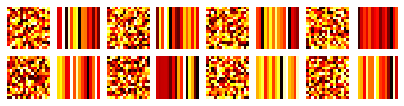

FedAVG, 10 Local Epochs, Communication Round: 1


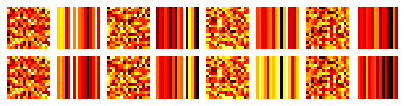

FedAVG, 10 Local Epochs, Communication Round: 2


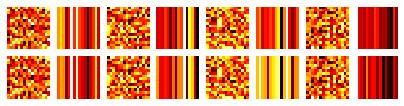

FedAVG, 10 Local Epochs, Communication Round: 3


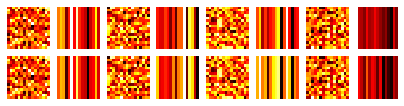

In [45]:
algor = 'FedAVG'
log_prefix = os.path.join('weight_logs', '6_benchmark_fedma_')
EPOCH = 8
for epoch in range(4): #(EPOCH):
    print(algor + ', 10 Local Epochs, Communication Round: ' + str(epoch))
    log_file = log_prefix + str(epoch) + '.pkl'
    node_weights = None
    with open(log_file, 'rb') as fin:
        node_weights = pickle.load(fin)
    node_count = len(node_weights)

    fig = plt.figure(figsize=(7., 4.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
         nrows_ncols=(2, 8),  # creates 2x8 grid of axes
         axes_pad=0.1,  # pad between axes in inch.
         )    
    for node in range(node_count):
        node_weight = node_weights[node]
        K_kernel, K_bias, Q_kernel, Q_bias, V_kernel, V_bias, output_kernel, output_bias = node_weight        
        grid[node * 8 + 0].imshow(K_kernel, cmap='hot', interpolation='nearest')
        grid[node * 8 + 0].axis('off')
        grid[node * 8 + 1].imshow(np.stack([K_bias for _ in range(K_bias.shape[0])], axis=0), cmap='hot', interpolation='nearest')
        grid[node * 8 + 1].axis('off')
        grid[node * 8 + 2].imshow(Q_kernel, cmap='hot', interpolation='nearest')
        grid[node * 8 + 2].axis('off')
        grid[node * 8 + 3].imshow(np.stack([Q_bias for _ in range(Q_bias.shape[0])], axis=0), cmap='hot', interpolation='nearest')
        grid[node * 8 + 3].axis('off')
        grid[node * 8 + 4].imshow(V_kernel, cmap='hot', interpolation='nearest')
        grid[node * 8 + 4].axis('off')
        grid[node * 8 + 5].imshow(np.stack([V_bias for _ in range(V_bias.shape[0])], axis=0), cmap='hot', interpolation='nearest')
        grid[node * 8 + 5].axis('off')
        grid[node * 8 + 6].imshow(output_kernel, cmap='hot', interpolation='nearest')
        grid[node * 8 + 6].axis('off')
        grid[node * 8 + 7].imshow(np.stack([output_bias for _ in range(output_bias.shape[0])], axis=0), cmap='hot', interpolation='nearest')
        grid[node * 8 + 7].axis('off')
    
    display(fig)
    plt.close()
    

Matched-FedAVG, 10 Local Epochs, Communication Round: 0


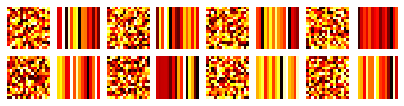

Matched-FedAVG, 10 Local Epochs, Communication Round: 1


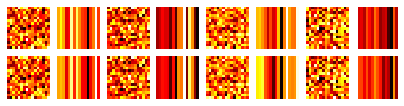

Matched-FedAVG, 10 Local Epochs, Communication Round: 2


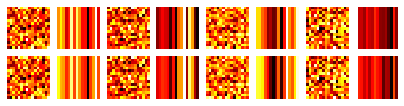

Matched-FedAVG, 10 Local Epochs, Communication Round: 3


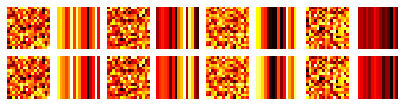

In [46]:
algor = 'Matched-FedAVG'
log_prefix = os.path.join('weight_logs', '6_benchmark_mfedma_')
EPOCH = 8
for epoch in range(4): #(EPOCH):
    print(algor + ', 10 Local Epochs, Communication Round: ' + str(epoch))
    log_file = log_prefix + str(epoch) + '.pkl'
    node_weights = None
    with open(log_file, 'rb') as fin:
        node_weights = pickle.load(fin)
    node_count = len(node_weights)

    fig = plt.figure(figsize=(7., 4.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
         nrows_ncols=(2, 8),  # creates 2x8 grid of axes
         axes_pad=0.1,  # pad between axes in inch.
         )    
    for node in range(node_count):
        node_weight = node_weights[node]
        K_kernel, K_bias, Q_kernel, Q_bias, V_kernel, V_bias, output_kernel, output_bias = node_weight        
        grid[node * 8 + 0].imshow(K_kernel, cmap='hot', interpolation='nearest')
        grid[node * 8 + 0].axis('off')
        grid[node * 8 + 1].imshow(np.stack([K_bias for _ in range(K_bias.shape[0])], axis=0), cmap='hot', interpolation='nearest')
        grid[node * 8 + 1].axis('off')
        grid[node * 8 + 2].imshow(Q_kernel, cmap='hot', interpolation='nearest')
        grid[node * 8 + 2].axis('off')
        grid[node * 8 + 3].imshow(np.stack([Q_bias for _ in range(Q_bias.shape[0])], axis=0), cmap='hot', interpolation='nearest')
        grid[node * 8 + 3].axis('off')
        grid[node * 8 + 4].imshow(V_kernel, cmap='hot', interpolation='nearest')
        grid[node * 8 + 4].axis('off')
        grid[node * 8 + 5].imshow(np.stack([V_bias for _ in range(V_bias.shape[0])], axis=0), cmap='hot', interpolation='nearest')
        grid[node * 8 + 5].axis('off')
        grid[node * 8 + 6].imshow(output_kernel, cmap='hot', interpolation='nearest')
        grid[node * 8 + 6].axis('off')
        grid[node * 8 + 7].imshow(np.stack([output_bias for _ in range(output_bias.shape[0])], axis=0), cmap='hot', interpolation='nearest')
        grid[node * 8 + 7].axis('off')
    
    display(fig)
    plt.close()
    